In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import sweetviz as sv

In [3]:
PROJECT_PATH = "C:/Users/USER/OneDrive/Bureau/ProjectInterPromo/"

In [4]:
categories = pd.read_csv(PROJECT_PATH +"data/categories.csv",sep=";")
categories

,EQUIP,DIG,HB,SIGNA,ECO,AUTRE,Y
0,top_affecte,INDICMAIL,NBJ_CNT_AGENCE_DEPOT_6M,cp_ou_pays,SURFACE_FINANCIERE,top_situ_particuliere,TOP_FRAUDE
1,note_Funivers,INDICTEL,NBJ_CNT_AGENCE_VENTE_6M,SECTEUR_GESTION,ENCOURS_DAV,NaN,TOP_FRAUDE_VIREMENT
2,note_Fassu,INDICPOR,NBJ_CNT_RDV_AGENCE_6M,anciennete,MONETAIRE_DISPONIBLE,NaN,TOP_FRAUDE_CARTE
3,note_Fcredit,INDICSMS,NBJ_CNT_AUTOMATE_RETRAIT_6M,seg_nature_potentiel,MONETAIRE_BLOQUE,NaN,NaN
4,note_Fepargne,INDICMAILING,NBJ_CNT_AUTOMATES_DEPOT_6M,NB_PARTENAIRES,EMPRUNTS,NaN,NaN
...,...,...,...,...,...,...,...
135,NaN,NaN,mt_reduc_ttc_M6,NaN,NaN,NaN,NaN
136,NaN,NaN,mt_rist_ttc_M,NaN,NaN,NaN,NaN
137,NaN,NaN,mt_rist_ttc_M6,NaN,NaN,NaN,NaN
138,NaN,NaN,Fidelite_calcule,NaN,NaN,NaN,NaN


In [5]:
l1=[]
for x in range(len(categories["EQUIP"])):
    if pd.isna(categories["EQUIP"][x])!=True:
        l1.append(categories["EQUIP"][x])
l1

['top_affecte',
 'note_Funivers',
 'note_Fassu',
 'note_Fcredit',
 'note_Fepargne',
 'note_FService',
 'top_produit_collecte',
 'top_produit_monetaire_dispo',
 'top_produit_monetaire_bloque',
 'top_produit_emprunts',
 'top_produit_epargne_logement',
 'nb_DAV',
 'nb_produit_Assurance',
 'nb_produit_Cartes',
 'nb_produit_Credit',
 'nb_produit_Epargne',
 'nb_produit_Services',
 'top_DAV',
 'top_produit_Assurance',
 'top_produit_Cartes',
 'top_produit_Credit',
 'top_produit_Epargne',
 'top_produit_Services']

In [7]:
data_trasfo=pd.read_csv(PROJECT_PATH +"data/donnee_v2_ech_train_transfo.csv")
data_trasfo

,Unnamed: 0,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,...,EPARGNE_LOGEMENT_ECART_M6_pos,EPARGNE_LOGEMENT_ECART_M6_neg,MONETAIRE_DISPONIBLE_pos,MONETAIRE_DISPONIBLE_neg,mt_reduc_ttc_M_pos,mt_reduc_ttc_M_neg,MONETAIRE_DISPONIBLE_M6_pos,MONETAIRE_DISPONIBLE_M6_neg,MONETAIRE_DISPONIBLE_ECART_M6_pos,MONETAIRE_DISPONIBLE_ECART_M6_neg
0,0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0,0.000000,0,0,0,0.000000,0,0.000000,0
1,1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,...,0.0,0,4.043051,0,0,0,4.043051,0,0.000000,0
2,2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0.0,0,7.170888,0,0,0,7.170888,0,0.000000,0
3,3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0.0,0,7.496097,0,0,0,6.154858,0,7.170888,0
4,4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0.0,0,9.642188,0,0,0,9.433564,0,7.937732,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764466,764466,8351PG816ln0/sIDd6IBfqnaA==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0.0,0,0.000000,0,0,0,0.000000,0,0.000000,0
764467,764467,835mBEOByTBamgQVgQg771KDA==,1,1,0,1.0,1.0,0.0,0.0,1.0,...,0.0,0,5.739793,0,0,0,0.000000,0,5.739793,0
764468,764468,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,1.0,1.0,1.0,0.0,1.0,...,0.0,0,0.000000,0,0,0,0.000000,0,0.000000,0
764469,764469,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0,8.294300,0,0,0,0.000000,0,8.294300,0


In [56]:
data_trasfo[l1]

,top_affecte,note_Funivers,note_Fassu,note_Fcredit,note_Fepargne,note_FService,top_produit_collecte,top_produit_monetaire_dispo,top_produit_monetaire_bloque,top_produit_emprunts,...,nb_produit_Cartes,nb_produit_Credit,nb_produit_Epargne,nb_produit_Services,top_DAV,top_produit_Assurance,top_produit_Cartes,top_produit_Credit,top_produit_Epargne,top_produit_Services
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,5.153639,3.558089,2.553429,2.181742,3.880722,1.0,1.0,0.0,0.0,...,1.386294,1.732051,2.236068,3.605551,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,3.860052,0.000000,0.000000,1.542725,3.880722,1.0,1.0,0.0,0.0,...,0.693147,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,4.566180,0.000000,2.553429,1.542725,3.880722,1.0,1.0,0.0,0.0,...,1.386294,1.732051,1.732051,3.000000,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,5.153639,2.905168,3.612478,2.670206,3.880722,1.0,1.0,0.0,0.0,...,1.609438,2.645751,3.316625,3.316625,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764466,0.0,3.860052,2.054264,0.000000,0.000000,2.744085,1.0,0.0,0.0,0.0,...,0.693147,0.000000,0.000000,1.414214,1.0,1.0,1.0,0.0,0.0,1.0
764467,1.0,3.860052,0.000000,0.000000,2.181742,2.744085,1.0,1.0,0.0,0.0,...,1.098612,0.000000,1.000000,1.414214,1.0,0.0,1.0,0.0,1.0,1.0
764468,0.0,3.860052,0.000000,0.000000,1.542725,3.880722,1.0,0.0,0.0,0.0,...,1.098612,1.000000,1.000000,2.449490,1.0,1.0,1.0,1.0,1.0,1.0
764469,1.0,5.153639,2.054264,2.553429,1.542725,2.744085,1.0,1.0,0.0,0.0,...,0.693147,1.732051,1.000000,1.414214,1.0,1.0,1.0,1.0,1.0,1.0


In [1]:
import seaborn as sns

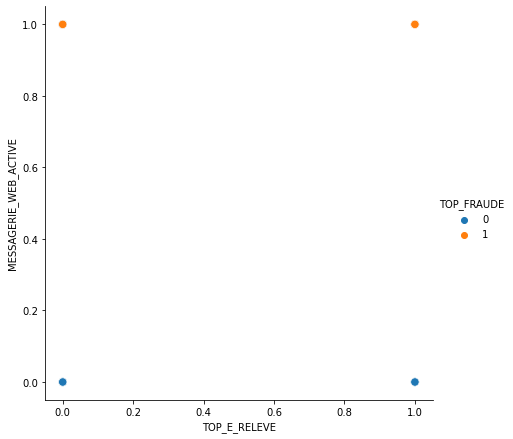

In [8]:
sns.relplot(x="TOP_E_RELEVE",y="MESSAGERIE_WEB_ACTIVE",hue="TOP_FRAUDE",data=data_trasfo,height=6,s=70) 
plt.show()

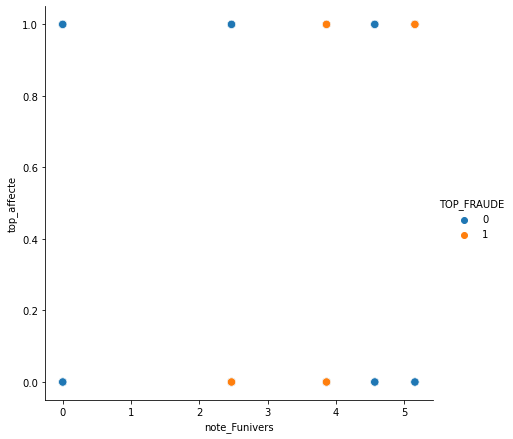

In [9]:
sns.relplot(x="note_Funivers",y="top_affecte",hue="TOP_FRAUDE",data=data_trasfo,height=6,s=70) 
plt.show()

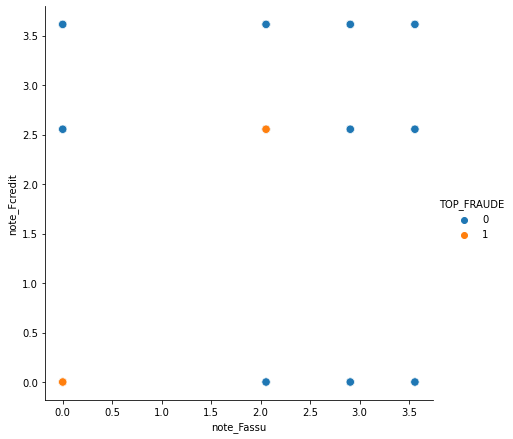

In [10]:
sns.relplot(x="note_Fassu",y="note_Fcredit",hue="TOP_FRAUDE",data=data_trasfo,height=6,s=70) 
plt.show()

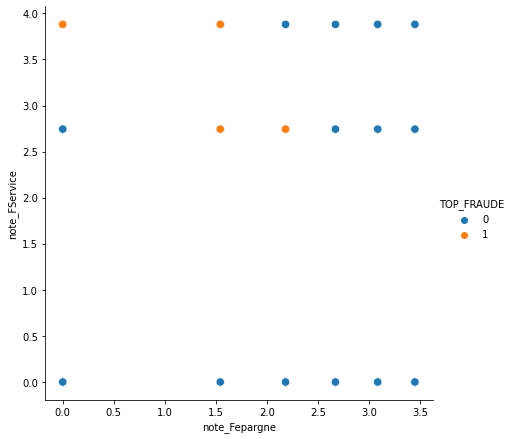

In [11]:
sns.relplot(x="note_Fepargne",y="note_FService",hue="TOP_FRAUDE",data=data_trasfo,height=6,s=70) 
plt.show()

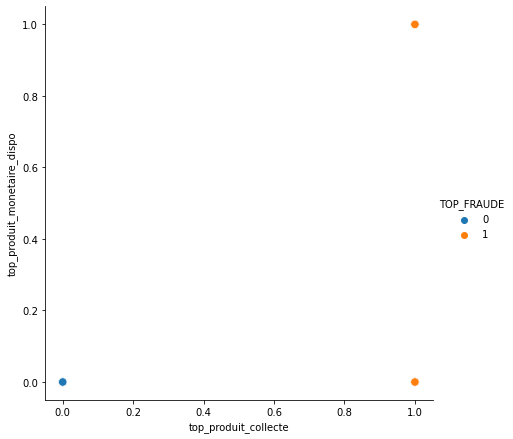

In [12]:
sns.relplot(x="top_produit_collecte",y="top_produit_monetaire_dispo",hue="TOP_FRAUDE",data=data_trasfo,height=6,s=70) 
plt.show()

In [ ]:
sns.relplot(x="note_Fassu",y="note_Fcredit",hue="TOP_FRAUDE",data=data_trasfo,height=6,s=70) 
plt.show()

In [ ]:
sns.relplot(x="note_Fassu",y="note_Fcredit",hue="TOP_FRAUDE",data=data_trasfo,height=6,s=70) 
plt.show()

In [ ]:
sns.relplot(x="note_Fassu",y="note_Fcredit",hue="TOP_FRAUDE",data=data_trasfo,height=6,s=70) 
plt.show()

In [ ]:
sns.relplot(x="note_Fassu",y="note_Fcredit",hue="TOP_FRAUDE",data=data_trasfo,height=6,s=70) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt

size = [100,500,100,500]

plt.scatter(data_trasfo["top_produit_collecte"], data_trasfo["top_produit_monetaire_dispo"], s=size, c='coral', label='class 1')


size = [100,500,100,500]

plt.scatter(x, y, s=size, c='lightblue', label='class 2')

plt.legend()

plt.title('Nuage de points avec Matplotlib')
plt.xlabel("top_produit_collecte")
plt.ylabel("top_produit_monetaire_dispo")
plt.savefig('ScatterPlot_04.png')
plt.show()